In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg, stats
from tqdm import tqdm

import tensor_utils as utils

np.random.seed(14159)

In [5]:
# Set parameters
n = np.array([50, 100, 350])
d = len(n)
N = np.sum(n)
c = n/N

setting = "$N = {{{}}} \\quad \\mathbf{{c}} = {{{}}}^\\top$".format(N, list(np.round(c, 2)))

betas = [1, 2, 3]
n_reps = 1000

n_betas = len(betas)

In [3]:
sigmas = np.zeros((n_reps, n_betas))
for i in tqdm(range(n_reps)):
    for j, beta in enumerate(betas):
        x = [stats.norm.rvs(size=ni) for ni in n]
        x = [x[i]/linalg.norm(x[i]) for i in range(d)]
        T = utils.make_T(n, x, beta)
        sigmas[i, j], _ = utils.CPD1(T)

100%|██████████| 1000/1000 [31:37<00:00,  1.90s/it]


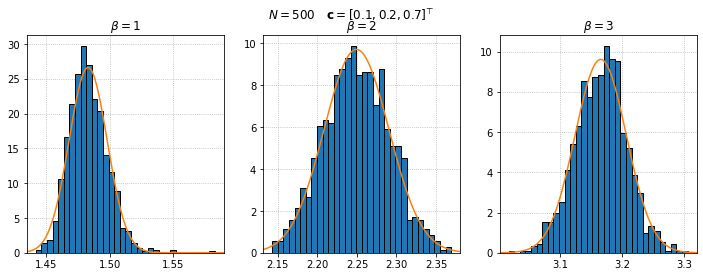

In [6]:
mean = np.mean(sigmas, axis=0)
std = np.std(sigmas, ddof=1, axis=0)

fig, axes = plt.subplots(1, n_betas, figsize=(4*n_betas, 4))
fig.suptitle(setting)
for i, ax in enumerate(axes):
    ax.hist(sigmas[:, i], density=True, bins='sqrt', edgecolor='black', zorder=2)
    ax.grid(ls=':')

    xmin, xmax = ax.get_xlim()
    xx = np.linspace(xmin, xmax, 200)
    yy = stats.norm.pdf(xx, loc=mean[i], scale=std[i])
    ax.plot(xx, yy)
    ax.set_xlim(xmin, xmax)

    ax.set_title("$\\beta = {}$".format(betas[i]))